# Part-I: Naive Bayes

### Task 1: Implementing Naive Bayes
*Implement a Gaussian Naive Bayes classifier on the Breast Cancer dataset to predict whether a tumor is malignant or benign.*
*Evaluate the model's performance using accuracy, a confusion matrix, and a classification report.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(matrix)
print('\nClassification Report:')
print(report)

Accuracy: 0.9415204678362573

Confusion Matrix:
[[ 57   6]
 [  4 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



### Task 2: The “Naive” Assumption
*Discuss the “naive” assumption of Naive Bayes. What does it assume about the features, and how does this assumption impact the model's performance?*

The "naive" assumption of Naive Bayes is the **assumption of conditional independence** among features. It presumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. This simplifies calculations significantly, making the model fast and efficient. 

This assumption is often violated in real-world scenarios where features are correlated. However, despite this, Naive Bayes can still perform surprisingly well, especially in applications like text classification. Its performance may be hampered if features are strongly dependent, as the model won't capture their interplay.

### Task 3: Types of Naive Bayes
*Briefly describe the difference between Gaussian, Multinomial, and Bernoulli Naive Bayes. When would you use each?*

- **Gaussian Naive Bayes**: Used for continuous features, assuming they follow a Gaussian (normal) distribution. It is suitable for data where features are measurements, like the sensor data in the Breast Cancer dataset.
- **Multinomial Naive Bayes**: Designed for discrete counts. It is commonly used in text classification where the features are word counts or term frequencies (e.g., how many times a word appears in a document).
- **Bernoulli Naive Bayes**: Works with binary features (i.e., features that are either 0 or 1). It is useful in text classification when using a binary or "bag-of-words" model, where the features are simply whether a word is present in a document or not.

# Part-II: Decision Tree

### Task 4: Building a Decision Tree Classifier
*Build a Decision Tree Classifier on the Iris dataset. Evaluate its performance using accuracy.*

In [3]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_i, y_train_i)

y_pred_i = dt.predict(X_test_i)
accuracy_i = accuracy_score(y_test_i, y_pred_i)

print(f'Decision Tree Accuracy: {accuracy_i}')

Decision Tree Accuracy: 1.0


### Task 5: Visualizing the Decision Tree
*Visualize the trained decision tree from Task 4 using `matplotlib` and `sklearn.tree.plot_tree`.*

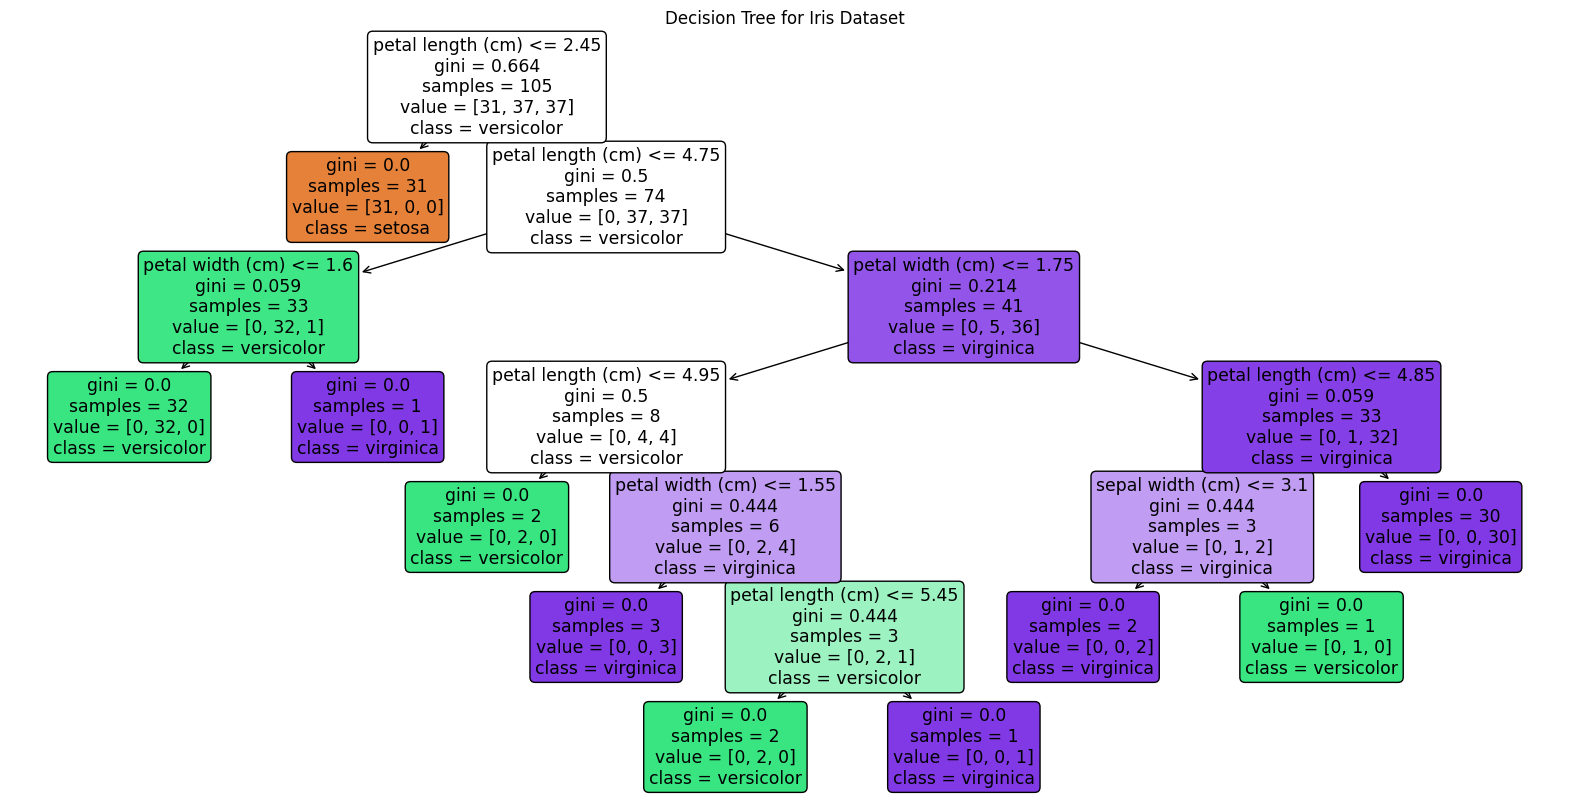

In [4]:
plt.figure(figsize=(20,10))
plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True, 
    rounded=True
)
plt.title('Decision Tree for Iris Dataset')
plt.show()

### Task 6: Gini Impurity and Information Gain
*Briefly explain the concepts of Gini Impurity and Information Gain in the context of decision trees.*

- **Gini Impurity**: This metric measures the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data. A Gini impurity of 0 represents a pure node (all elements belong to a single class), while a value of 0.5 indicates a node with an equal distribution of elements across classes in a binary classification task. Decision trees aim to find splits that minimize Gini impurity.

- **Information Gain**: This is the reduction in entropy (a measure of disorder or uncertainty) achieved by splitting the data on a particular feature. A decision tree algorithm chooses the feature for splitting that provides the highest information gain. In essence, it picks the split that does the best job of separating the data into purer, more homogeneous child nodes.

### Task 7: Pruning
*Discuss how pruning helps prevent overfitting in decision trees.*

Pruning is a technique used to reduce the size and complexity of a decision tree to prevent overfitting. An unpruned tree can grow very deep, capturing noise and specific patterns of the training data that do not generalize to new, unseen data. Pruning works by removing parts of the tree (subtrees or nodes) that provide little predictive power. This results in a smaller, simpler model that is less likely to overfit and typically performs better on test data.

# Part-III: Ensemble Methods

### Task 8: Random Forest Classifier
*Implement a Random Forest Classifier on the Breast Cancer dataset. Compare its accuracy to the Naive Bayes model from Task 1.*

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Naive Bayes Accuracy: {accuracy}')
print(f'Random Forest Accuracy: {accuracy_rf}')

Naive Bayes Accuracy: 0.9415204678362573
Random Forest Accuracy: 0.9707602339181286


### Task 9: AdaBoost Classifier
*Implement an AdaBoost Classifier on the same dataset. Compare its accuracy to both the Random Forest and Naive Bayes models.*

In [6]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f'Naive Bayes Accuracy: {accuracy}')
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'AdaBoost Accuracy: {accuracy_ada}')

c:\Users\ASUS1\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Naive Bayes Accuracy: 0.9415204678362573
Random Forest Accuracy: 0.9707602339181286
AdaBoost Accuracy: 0.9766081871345029


### Task 10: Bias-Variance Tradeoff
*Explain the bias-variance tradeoff and discuss how bagging and boosting methods relate to it.*

The **bias-variance tradeoff** is a fundamental concept in machine learning. 
- **Bias** refers to the error from erroneous assumptions in the learning algorithm. High bias can cause a model to miss relevant relations between features and target outputs (underfitting).
- **Variance** refers to the error from sensitivity to small fluctuations in the training set. High variance can cause a model to capture random noise in the training data (overfitting).

- **Bagging** methods, like Random Forest, primarily work to **reduce variance**. By training multiple models on different subsets of the data and averaging their predictions, bagging smooths out the predictions and makes the final model less sensitive to the specific training data, thus reducing the risk of overfitting.
- **Boosting** methods, like AdaBoost, primarily work to **reduce bias**. They build models sequentially, where each new model focuses on correcting the errors made by its predecessors. This iterative process creates a strong combined model that is better at capturing the underlying patterns in the data, thus reducing underfitting.

### Task 11: Bagging vs. Boosting
*What is the primary difference between Bagging and Boosting?*

The primary difference lies in how they build the ensemble of models. 
- **Bagging (Bootstrap Aggregating)** builds multiple independent models in **parallel**. Each model is trained on a different random subset of the original data (with replacement). The final prediction is typically an average or a majority vote of all the individual models' predictions.
- **Boosting** builds models **sequentially**. Each subsequent model is trained to correct the mistakes of the previous ones. It gives more weight to the data points that were misclassified by earlier models, forcing the new model to focus on the hardest cases. The final prediction is a weighted sum of the predictions from all models.